# **Importing The Dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/content/emails.csv')

In [ ]:
data.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [ ]:
data.isnull().sum()

,0
text,0
spam,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [ ]:
data.spam.unique()

array([1, 0])

In [ ]:
data.shape

(5728, 2)

# **Data Cleaning and Preprocessing**

In [ ]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
corpus = []
for i in range(0, len(data)):
  review = re.sub('[^a-zA-Z]', ' ', data['text'][i])
  review = review.lower()
  review = review.split()

  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

# **Creating The Bag of word Model**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cn = CountVectorizer(max_features=5000)
X = cn.fit_transform(corpus).toarray()

In [ ]:
Y = data['spam'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
spam_model = LogisticRegression().fit(X_train, Y_train)


In [ ]:
y_pred = spam_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(Y_test, y_pred)

<Axes: >

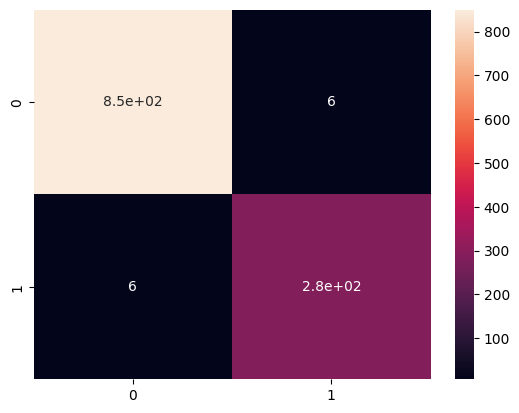

In [ ]:
import seaborn as sns
sns.heatmap(confusion_m, annot=True)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
classification_r = classification_report(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
print(classification_r)
accuracy

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       856
           1       0.98      0.98      0.98       290

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



0.9895287958115183